In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *


# Performing Some EDA and Data Cleaning on the dataframe:-

# EDA:-

In [2]:
df_data=pd.read_csv("churn_details.csv")

In [3]:
df_data.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df_data.shape

(2000, 15)

In [5]:
df_data.columns

Index(['Unnamed: 0', 'RowNumber', 'CustomerId', 'Surname', 'CreditScore',
       'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
#To check the unique count of values in every column:-
df_data.nunique()

Unnamed: 0         2000
RowNumber          2000
CustomerId         2000
Surname            1193
CreditScore         408
Geography             3
Gender                2
Age                  63
Tenure               11
Balance            1294
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    2000
Exited                2
dtype: int64

In [7]:
#There is no null value in any of the columns in the given datasets:-
df_data.isnull().sum()

Unnamed: 0         0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Data Cleaning:- 

In [8]:
#Dropping the "Unnamed: 0'" from the original dataframe as because it is less significant :-
df_data=df_data.drop(columns="Unnamed: 0")
df_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
#After removing the "Unnamed: 0" column from the dataset the dataframe looks like this:-
df_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#After removing the "Unnamed: 0" column from the dataset the shape looks like this:-
df_data.shape

(2000, 14)

In [11]:
#To display all the Continuous fields :-
num_cols=df_data._get_numeric_data().columns
cont_cols=[]
for i in num_cols:
    if(len(df_data[i].unique()))>int(df_data.shape[0]/25):
        cont_cols.append(i)
print(cont_cols)

['RowNumber', 'CustomerId', 'CreditScore', 'Balance', 'EstimatedSalary']


In [12]:
#To display all the categorical fields :-
cat_cols=list(set(df_data.columns)-set(cont_cols))
print(cat_cols)

['Exited', 'Surname', 'Gender', 'IsActiveMember', 'Age', 'NumOfProducts', 'HasCrCard', 'Geography', 'Tenure']


# Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations:-

In [13]:
#The target variable is "Exited" and rest all are the independent variables:-

# ->Bi-varite Analysis Between Two Categorical Types:- 

Exited    0    1
Gender          
Female  702  233
Male    882  183


<Axes: xlabel='Exited', ylabel='Gender'>

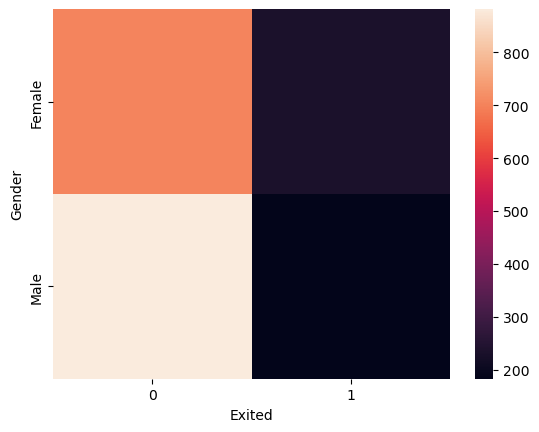

In [14]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Gender"],df_data["Exited"]))
sns.heatmap(pd.crosstab(df_data["Gender"],df_data["Exited"]))

# INFERENCES:-

In [15]:
#People who have not exited the bank are mostly males and who have exited the bank are mostly females

Exited       0    1
Geography          
France     792  170
Germany    358  148
Spain      434   98


<Axes: xlabel='Exited', ylabel='Geography'>

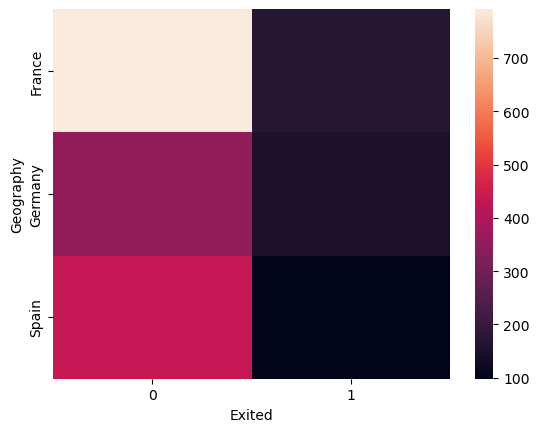

In [16]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Geography"],df_data["Exited"]))
sns.heatmap(pd.crosstab(df_data["Geography"],df_data["Exited"]))

# INFERENCES:-

In [17]:
#People who have not exited the bank are mostly from France and who have exited the bank are also from france

Exited           0    1
NumOfProducts          
1              724  297
2              852   63
3                8   49
4                0    7


<Axes: xlabel='Exited', ylabel='NumOfProducts'>

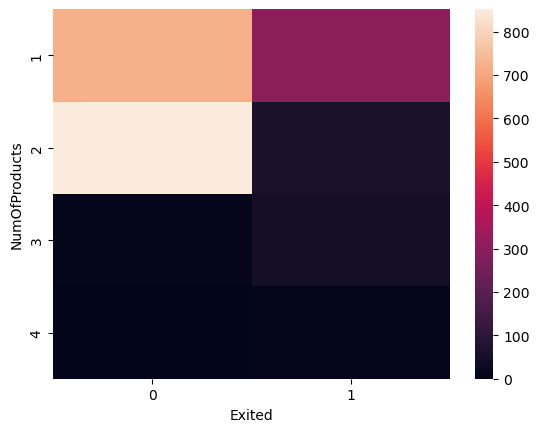

In [18]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["NumOfProducts"],df_data["Exited"]))
sns.heatmap(pd.crosstab(df_data["NumOfProducts"],df_data["Exited"]))

# INFERENCES:-

In [19]:
#People who have not exited the bank are having no.of products as 2 and who have exited the bank are having no.of products as 1

Exited            0  1
Surname               
Abbie             1  0
Abramov           0  1
Abramovich        0  1
Achebe            1  0
Afamefuna         1  0
...              .. ..
Zhirov            2  0
Zikoranachidimma  2  0
Zikoranaudodimma  0  1
Zuev              1  0
Zuyev             0  1

[1193 rows x 2 columns]


<Axes: xlabel='Exited', ylabel='Surname'>

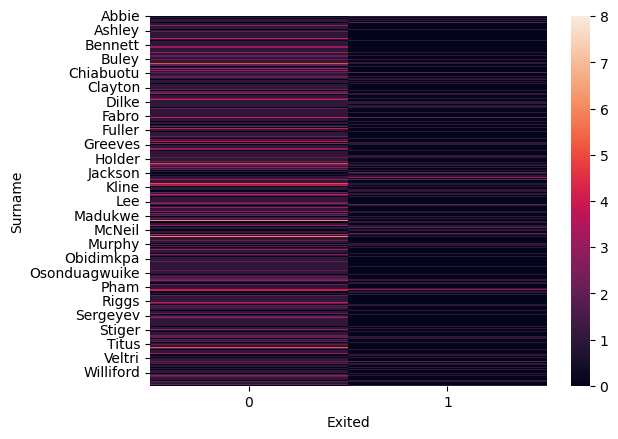

In [20]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Surname"],df_data["Exited"]))
sns.heatmap(pd.crosstab(df_data["Surname"],df_data["Exited"]))

# INFERENCES:-

In [21]:
#Probably to draw inference w.r.t surname is not possible

Exited    0   1
Tenure         
0        61  15
1       145  51
2       157  39
3       167  38
4       151  44
5       159  50
6       151  38
7       184  36
8       183  44
9       150  44
10       76  17


<Axes: xlabel='Exited', ylabel='Tenure'>

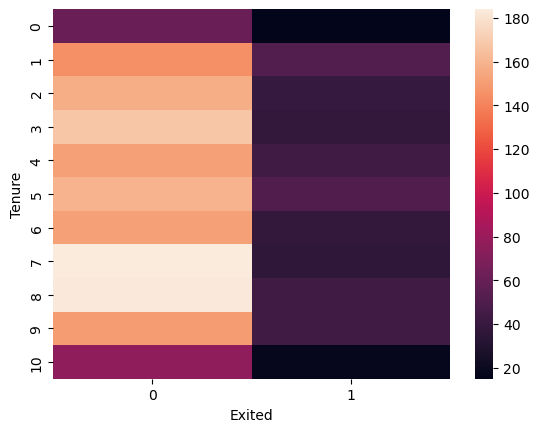

In [22]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Tenure"],df_data["Exited"]))
sns.heatmap(pd.crosstab(df_data["Tenure"],df_data["Exited"]))

# INFERENCES:-

In [23]:
#People who have not exited the bank are having Tenure as 7 and who have exited the bank are having Tenure as 1

Exited   0  1
Age          
18       3  0
19       2  0
20       5  1
21      12  1
22      15  3
..      .. ..
76       1  0
77       1  0
79       1  0
80       1  0
82       1  0

[63 rows x 2 columns]


<Axes: xlabel='Exited', ylabel='Age'>

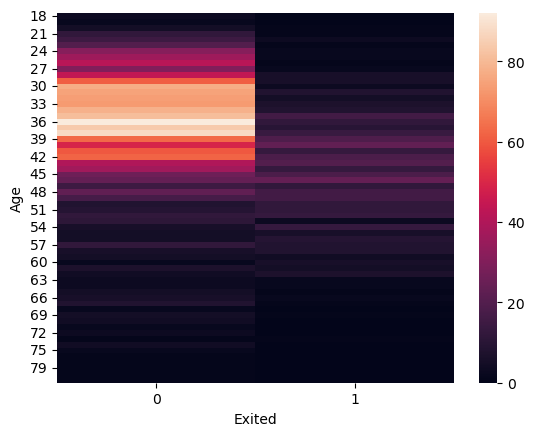

In [24]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Age"],df_data["Exited"]))
sns.heatmap(pd.crosstab(df_data["Age"],df_data["Exited"]))

# INFERENCES:-

In [25]:
#Probably to draw inference w.r.t age is quite difficult

Exited        0    1
HasCrCard           
0           460  127
1          1124  289


<Axes: xlabel='Exited', ylabel='HasCrCard'>

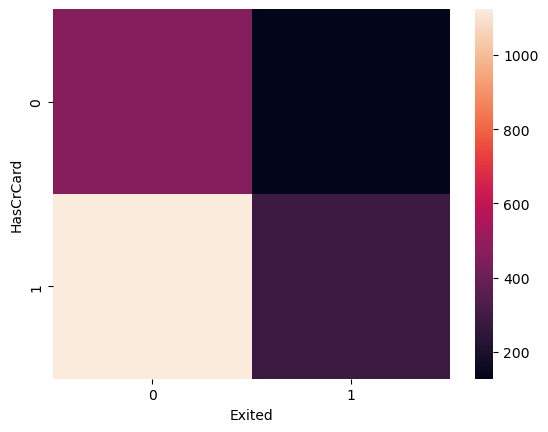

In [26]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["HasCrCard"],df_data["Exited"]))
sns.heatmap(pd.crosstab(df_data["HasCrCard"],df_data["Exited"]))

# INFERENCES:-

In [27]:
#People who have and also who have not exited the bank are having no.of credit cards as 1

Exited            0    1
IsActiveMember          
0               683  291
1               901  125


<Axes: xlabel='Exited', ylabel='IsActiveMember'>

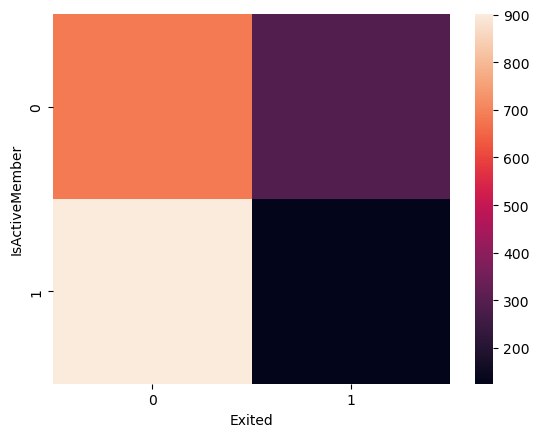

In [28]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["IsActiveMember"],df_data["Exited"]))
sns.heatmap(pd.crosstab(df_data["IsActiveMember"],df_data["Exited"]))

# INFERENCES:-

In [29]:
#People who have not exited the bank are active members and who have exited the bank are not active members

# ->Bi-varite Analysis Between Categorical And ContinuousTypes:- 

<Axes: xlabel='Exited', ylabel='RowNumber'>

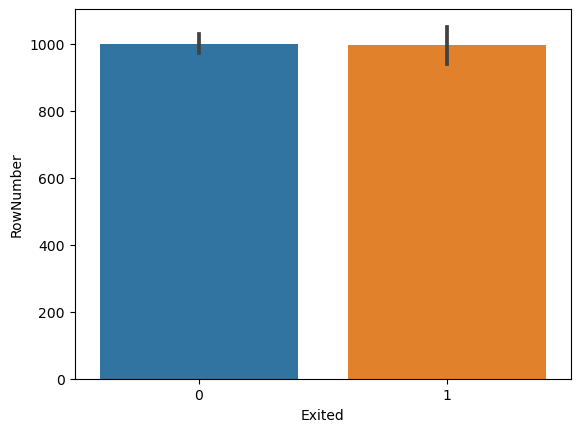

In [30]:
 sns.barplot(x="Exited",y="RowNumber",data=df_data)

# INFERENCES:-

In [31]:
#People who have and not have exited the bank are almost same in counting

<Axes: xlabel='Exited', ylabel='CustomerId'>

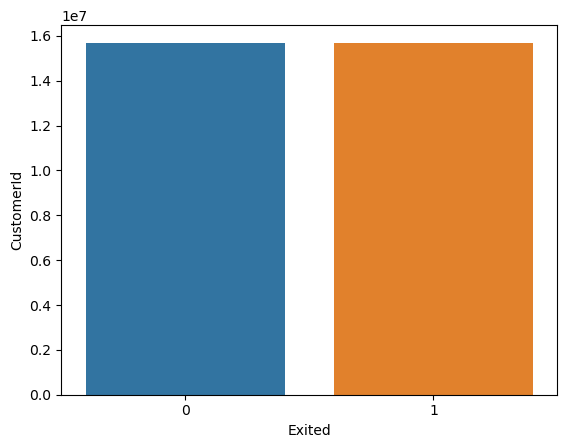

In [32]:
 sns.barplot(x="Exited",y="CustomerId",data=df_data)

# INFERENCES:-

In [33]:
#The customer Id is always unique for each customer so there is equal distribution for the exited field

<Axes: xlabel='Exited', ylabel='CreditScore'>

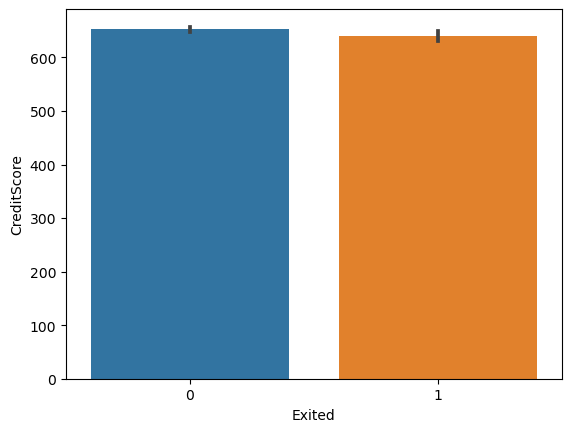

In [34]:
 sns.barplot(x="Exited",y="CreditScore",data=df_data)

# INFERENCES:-

In [35]:
#People who have not exited the bank are having a slightly higher credit score 

<Axes: xlabel='Exited', ylabel='Balance'>

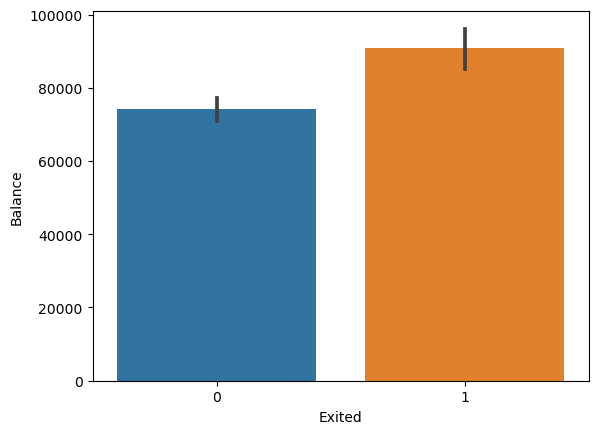

In [36]:
 sns.barplot(x="Exited",y="Balance",data=df_data)

# INFERENCES:-

In [37]:
#People who have exited the bank are having more balance in their account.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

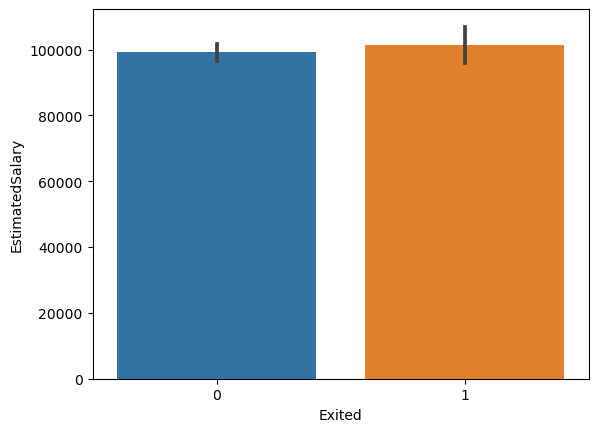

In [38]:
 sns.barplot(x="Exited",y="EstimatedSalary",data=df_data)

# INFERENCES:-

In [39]:
#People who have exited the bank are having more estimatedsalary in their account.

# How is the class distribution (Y/N) in Label(Target) Variable ?

0    1584
1     416
Name: Exited, dtype: int64


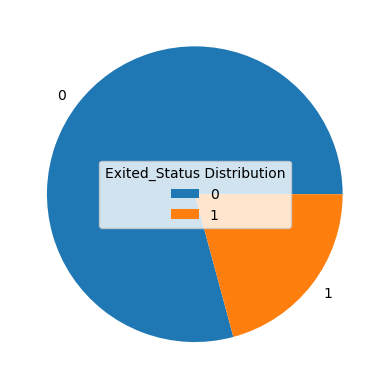

In [40]:
#To count the no.of Y/N in the Exited Column and plotting it:-
ax=df_data["Exited"].value_counts()
Mylabels=[0,1]
print(ax)
plt.pie(ax,labels=Mylabels)
plt.legend(title="Exited_Status Distribution")
plt.show()

In [41]:
#To Look more clearly how the Y/N are distributed for all the other features:-
df_data.groupby(by="Exited").count()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,,,,
0,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584
1,416,416,416,416,416,416,416,416,416,416,416,416,416


In [42]:
new_data=df_data.copy()
new_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Train_Test_Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
#Changing the categorical columns to the numerical ones:-
new_data["Surname"]=new_data["Surname"].astype("category")
new_data["Surname"]=new_data["Surname"].cat.codes
new_data["Gender"]=new_data["Gender"].astype("category")
new_data["Gender"]=new_data["Gender"].cat.codes
new_data["Geography"]=new_data["Geography"].astype("category")
new_data["Geography"]=new_data["Geography"].cat.codes
new_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,434,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,456,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,808,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,111,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,711,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,15617648,699,584,0,0,44,5,95671.75,2,1,1,106564.88,0
1996,1997,15755678,564,534,0,1,62,2,0.00,2,0,0,42763.12,1
1997,1998,15624781,672,672,0,0,34,1,142151.75,2,1,1,168753.34,0
1998,1999,15779497,1071,603,0,1,43,5,127823.93,1,1,1,19483.35,0


In [45]:
#Target variable:-
y=new_data["Exited"]
#All the otheer variables:-
X=new_data.drop(["Exited"],axis=1)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [48]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()
clf3=RandomForestClassifier()

In [49]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Tree",accuracy_score(y_test,y_pred2))
print("Accuracy of Random Forest",accuracy_score(y_test,y_pred3))


Accuracy of Logistic Regression 0.805
Accuracy of Decision Tree 0.81
Accuracy of Random Forest 0.855


In [52]:
#Confusion matrix by Logistic Regression:-
confusion_matrix(y_test,y_pred1)

array([[322,   0],
       [ 78,   0]], dtype=int64)

In [53]:
#Confusion Matrix by Decision Tree classification:- 
confusion_matrix(y_test,y_pred2)

array([[280,  42],
       [ 34,  44]], dtype=int64)

In [54]:
#Confusion Matrix by Random Forest classification:- 
confusion_matrix(y_test,y_pred3)

array([[313,   9],
       [ 49,  29]], dtype=int64)

In [55]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [56]:
print("For Logistic Regression Model")
print("-"*50)
cdf=pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision -",precision_score(y_test,y_pred1))
print("Recall -",recall_score(y_test,y_pred1))
print("F1 Score -",f1_score(y_test,y_pred1))


For Logistic Regression Model
--------------------------------------------------
     0  1
0  322  0
1   78  0
--------------------------------------------------
Precision - 0.0
Recall - 0.0
F1 Score - 0.0


C:\Users\Devanshi Gahlot\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
print("For Decision Tree Model")
print("-"*50)
cdf=pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision -",precision_score(y_test,y_pred2))
print("Recall -",recall_score(y_test,y_pred2))
print("F1 Score -",f1_score(y_test,y_pred2))


For Decision Tree Model
--------------------------------------------------
     0   1
0  280  42
1   34  44
--------------------------------------------------
Precision - 0.5116279069767442
Recall - 0.5641025641025641
F1 Score - 0.5365853658536586


In [58]:
print("For Random Forest Model")
print("-"*50)
cdf=pd.DataFrame(confusion_matrix(y_test,y_pred3),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision -",precision_score(y_test,y_pred3))
print("Recall -",recall_score(y_test,y_pred3))
print("F1 Score -",f1_score(y_test,y_pred3))

For Random Forest Model
--------------------------------------------------
     0   1
0  313   9
1   49  29
--------------------------------------------------
Precision - 0.7631578947368421
Recall - 0.3717948717948718
F1 Score - 0.5000000000000001


In [59]:
#Classification report by Logistic Regression:-
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       322
           1       0.00      0.00      0.00        78

    accuracy                           0.81       400
   macro avg       0.40      0.50      0.45       400
weighted avg       0.65      0.81      0.72       400



C:\Users\Devanshi Gahlot\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Devanshi Gahlot\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Devanshi Gahlot\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#Classification report by Decision tree classification:-
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       322
           1       0.51      0.56      0.54        78

    accuracy                           0.81       400
   macro avg       0.70      0.72      0.71       400
weighted avg       0.82      0.81      0.81       400



In [61]:
#Classification report by Random Forest:-
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92       322
           1       0.76      0.37      0.50        78

    accuracy                           0.85       400
   macro avg       0.81      0.67      0.71       400
weighted avg       0.84      0.85      0.83       400



# RandomSearch CV:-

In [62]:
#number of trees in random forest
n_estimators=[20,60,100,120]

#number of features to consider at every split
max_features=[0.2,0.6,1.0]

#maximum number of levels in tree
max_depth=[2,8,None]

#number of samples
max_samples=[0.5,0.75,1.0]

#minimum number of samples required to split a node
min_samples_split=[2,5]

#Minimum number of samples required at each laef node
min_samples_leaf=[1,2]


In [63]:
param_grid={"n_estimators":n_estimators,
           "max_features":max_features,
           "max_samples":max_samples,
           "max_depth":max_depth,
           "min_samples_split":min_samples_split,
           "min_samples_leaf":min_samples_leaf}
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_samples': [0.5, 0.75, 1.0], 'max_depth': [2, 8, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [64]:
rf=RandomForestClassifier()

In [65]:
from sklearn.model_selection import RandomizedSearchCV
rf_grid=RandomizedSearchCV(estimator=rf,
                    param_distributions=param_grid,
                    cv=5,
                    verbose=2,
                    n_jobs=-1)

In [66]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [67]:
rf_grid.best_params_

{'n_estimators': 60,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_samples': 0.75,
 'max_features': 0.6,
 'max_depth': 8}

In [68]:
rf_grid.best_score_

0.85

# If we have to find that which algorithm is more efficient then I would go for Random Forest


AFTER RANDOMIZED SEARCHCV THE RESULT IS APPROXIMATELY SAME .